In [81]:
import math
import pickle
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F

In [125]:
with open("results.pkl", "rb") as f:
    results = pickle.load(f)
with open("lang.pkl", "rb") as f:
    lang = pickle.load(f)

In [30]:
df = pd.DataFrame(results)
df

,inputs,targets,lengths,outputs,loss
0,"[142, 78, 54, 251, 2360, 405]","[78, 54, 251, 2360, 405, 10000]",[6],"[[-2.2921162, -3.2863421, -2.1783075, -2.55128...",5.51813
1,"[315, 706, 32, 101, 934, 935, 936, 874, 251, 5...","[706, 32, 101, 934, 935, 936, 874, 251, 572, 5...",[37],"[[-2.5192566, -3.3079512, -3.1927047, -2.72376...",3.6542494
2,"[307, 954, 4419, 3882, 424, 32, 687, 27, 1745,...","[954, 4419, 3882, 424, 32, 687, 27, 1745, 1884...",[26],"[[-2.3772712, -2.8581948, -2.1955106, -2.16599...",5.1269255
3,"[32, 27, 935, 2737, 1292, 152, 32, 812, 33, 44...","[27, 935, 2737, 1292, 152, 32, 812, 33, 4402, ...",[32],"[[-2.141458, -1.0489342, -2.1165955, -1.253909...",4.7702303
4,"[812, 1623, 1375, 2569, 64, 2775, 95, 64, 32, ...","[1623, 1375, 2569, 64, 2775, 95, 64, 32, 2141,...",[24],"[[-2.3761134, -1.2713917, -1.8186976, -1.47347...",4.0040145
...,...,...,...,...,...
3756,"[853, 2574, 26, 312, 42, 32, 682, 4921, 4464, ...","[2574, 26, 312, 42, 32, 682, 4921, 4464, 504, ...",[22],"[[-2.1350505, -2.116829, -3.1194227, -2.602402...",4.5987835
3757,"[374, 2173, 380, 1287, 64, 220, 1729, 2083]","[2173, 380, 1287, 64, 220, 1729, 2083, 10000]",[8],"[[-2.0035403, -2.6829042, -2.4385731, -2.47021...",5.372224
3758,"[160, 710, 2378, 119, 3302, 374, 1134, 152, 55...","[710, 2378, 119, 3302, 374, 1134, 152, 556, 26...",[20],"[[-2.9068222, -2.2648683, -3.218254, -1.668448...",5.0701585
3759,"[130, 26, 7649, 373, 130, 2573, 93, 32, 499, 4...","[26, 7649, 373, 130, 2573, 93, 32, 499, 40, 17...",[24],"[[-2.3578959, -3.2964883, -2.728866, -3.145028...",4.543903


In [33]:
def fetch_predictions(outputs):
    outputs = torch.tensor(outputs)
    softmax = F.softmax(outputs, dim=1)
    predictions = torch.argmax(softmax, dim=1)
    return predictions.numpy()

In [124]:
df2 = df.copy(deep=True)
df2["outputs"] = df.apply(lambda pred: fetch_predictions(pred["outputs"]), axis=1)
df2

,inputs,targets,lengths,outputs,loss
0,"[142, 78, 54, 251, 2360, 405]","[78, 54, 251, 2360, 405, 10000]",[6],"[247, 40, 26, 1855, 10000, 10000]",5.51813
1,"[315, 706, 32, 101, 934, 935, 936, 874, 251, 5...","[706, 32, 101, 934, 935, 936, 874, 251, 572, 5...",[37],"[32, 32, 26, 934, 935, 936, 119, 251, 154, 636...",3.6542494
2,"[307, 954, 4419, 3882, 424, 32, 687, 27, 1745,...","[954, 4419, 3882, 424, 32, 687, 27, 1745, 1884...",[26],"[42, 4419, 154, 108, 32, 7516, 27, 1745, 10000...",5.1269255
3,"[32, 27, 935, 2737, 1292, 152, 32, 812, 33, 44...","[27, 935, 2737, 1292, 152, 32, 812, 33, 4402, ...",[32],"[26, 27, 392, 40, 159, 32, 101, 33, 119, 938, ...",4.7702303
4,"[812, 1623, 1375, 2569, 64, 2775, 95, 64, 32, ...","[1623, 1375, 2569, 64, 2775, 95, 64, 32, 2141,...",[24],"[33, 1961, 154, 64, 26, 95, 32, 32, 26, 10000,...",4.0040145
...,...,...,...,...,...
3756,"[853, 2574, 26, 312, 42, 32, 682, 4921, 4464, ...","[2574, 26, 312, 42, 32, 682, 4921, 4464, 504, ...",[22],"[39, 26, 35, 42, 32, 26, 4921, 170, 26, 119, 1...",4.5987835
3757,"[374, 2173, 380, 1287, 64, 220, 1729, 2083]","[2173, 380, 1287, 64, 220, 1729, 2083, 10000]",[8],"[159, 154, 35, 10000, 220, 26, 10000, 10000]",5.372224
3758,"[160, 710, 2378, 119, 3302, 374, 1134, 152, 55...","[710, 2378, 119, 3302, 374, 1134, 152, 556, 26...",[20],"[32, 351, 32, 26, 119, 113, 32, 32, 1190, 26, ...",5.0701585
3759,"[130, 26, 7649, 373, 130, 2573, 93, 32, 499, 4...","[26, 7649, 373, 130, 2573, 93, 32, 499, 40, 17...",[24],"[131, 32, 10000, 42, 131, 93, 130, 26, 40, 26,...",4.543903


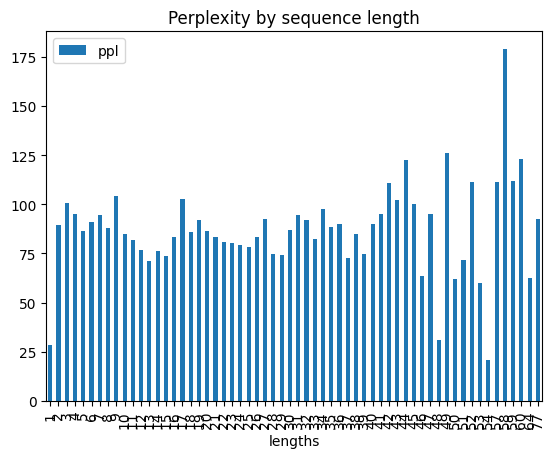

In [82]:
df2 = df.copy(deep=True)
df2["outputs"] = df.apply(lambda pred: fetch_predictions(pred["outputs"]), axis=1)
df2 = df2[['lengths', 'loss']]
df2['lengths'] = df2.apply(lambda x: list(x["lengths"])[0], axis=1)
df2 = df2.groupby("lengths").mean()
df2["ppl"] = df2.apply(lambda x: math.exp(x["loss"]), axis=1)
df2.plot(y="ppl", title="Perplexity by sequence length", kind="bar")
plt.show()

In [143]:
lang.ids2words[10000] = "<eos>"

In [144]:
from collections import Counter
df2 = df.copy(deep=True)
df2["outputs"] = df.apply(lambda pred: fetch_predictions(pred["outputs"]), axis=1)
targets = Counter()
for i, row in enumerate(df2["targets"]):
    # print(len(row))
    try:
        targets.update(row)
    except TypeError:
        targets.update([int(row)])
targets = dict(sorted(targets.items(), key=lambda x: x[1], reverse=True))
{lang.ids2words[k]: v  for (k, v) in targets.items()}

{'<unk>': 4606,
 'the': 3968,
 '<eos>': 3761,
 'N': 2494,
 'of': 2182,
 'to': 2024,
 'a': 1739,
 'and': 1471,
 'in': 1470,
 "'s": 903,
 'that': 782,
 'for': 741,
 'is': 665,
 'said': 601,
 '$': 544,
 'on': 481,
 'it': 443,
 'by': 437,
 'as': 426,
 'with': 393,
 'was': 391,
 'its': 385,
 'be': 384,
 'at': 375,
 'are': 361,
 'from': 354,
 'million': 348,
 "n't": 335,
 'have': 309,
 'market': 299,
 'has': 296,
 'will': 293,
 'about': 256,
 'an': 254,
 'company': 227,
 'mr.': 226,
 'he': 225,
 'or': 216,
 'year': 214,
 'this': 213,
 'new': 211,
 'were': 203,
 'which': 202,
 'more': 190,
 'would': 185,
 'they': 180,
 'u.s.': 177,
 'had': 175,
 'than': 173,
 'stock': 172,
 'their': 169,
 'been': 163,
 'but': 160,
 'friday': 157,
 'says': 156,
 'up': 145,
 'corp.': 144,
 'not': 139,
 'billion': 134,
 'share': 129,
 'inc.': 128,
 'his': 128,
 'one': 127,
 'prices': 125,
 'some': 119,
 'other': 119,
 'who': 118,
 '&': 118,
 'also': 118,
 'last': 116,
 'because': 108,
 'sales': 108,
 'all': 107,

In [145]:
df2 = df.copy(deep=True)
df2["outputs"] = df.apply(lambda pred: fetch_predictions(pred["outputs"]), axis=1)
outputs = Counter()
for i, row in enumerate(df2["outputs"]):
    # print(len(row))
    try:
        outputs.update(row)
    except TypeError:
        outputs.update([int(row)])
        
outputs = dict(sorted(outputs.items(), key=lambda x: x[1], reverse=True))
{lang.ids2words[k]: v  for (k, v) in outputs.items()}

{'<unk>': 14465,
 'the': 12240,
 '<eos>': 9367,
 'of': 3637,
 'N': 3195,
 'to': 2678,
 'a': 2318,
 "'s": 1541,
 'is': 1288,
 'be': 1251,
 'and': 1249,
 'in': 1190,
 'said': 1044,
 'are': 902,
 'that': 716,
 'been': 655,
 '$': 639,
 "n't": 605,
 'company': 555,
 'million': 471,
 'by': 416,
 'for': 394,
 'have': 374,
 'it': 348,
 'was': 326,
 'has': 315,
 'than': 289,
 'year': 286,
 'with': 270,
 'market': 239,
 'years': 219,
 'will': 214,
 'from': 212,
 'corp.': 204,
 'as': 176,
 "'re": 175,
 'on': 167,
 '&': 164,
 'u.s.': 161,
 'at': 146,
 'were': 142,
 'inc.': 141,
 'up': 140,
 'who': 136,
 'share': 134,
 'stock': 129,
 'york': 126,
 'quarter': 115,
 'co.': 114,
 'first': 112,
 'think': 108,
 'billion': 99,
 'rose': 97,
 'its': 97,
 'president': 96,
 "'": 95,
 'prices': 94,
 'sales': 94,
 'shares': 92,
 'sell': 86,
 'says': 84,
 'bonds': 83,
 'would': 83,
 'own': 82,
 'trading': 76,
 'companies': 76,
 'or': 76,
 'not': 75,
 'week': 73,
 'time': 69,
 'they': 69,
 'about': 68,
 'debt': 

In [ ]:
targets_df = pd.DataFrame(targets.items(), columns=["word", "count"])